In [1]:
import pandas as pd

In [2]:
from pandas import Series, DataFrame

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
import missingno as msno

In [8]:
import statsmodels.api as sm

In [9]:
import statistics

In [10]:
from scipy import stats

In [11]:
import pylab

In [12]:
from pylab import rcParams

In [13]:
from scipy.stats import chisquare

In [14]:
from scipy.stats import chi2_contingency

In [15]:
import sklearn

In [16]:
from sklearn import preprocessing

In [17]:
from sklearn import metrics

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
from sklearn.metrics import classification_report

In [21]:
df = pd.read_csv('churn_clean.csv')

In [22]:
df

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [23]:
#So there are 10,000 rows and 50 columns.
#List the columns
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [24]:
#Drop variables that are not pertinent to our analysis
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Income', 'Marital', 'Contract', 'Port_modem',
     'Contacts', 'Yearly_equip_failure', 'InternetService',
                      'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport',
       'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'])

In [25]:
#Nulls
df.isnull().sum()

Age                   0
Gender                0
Churn                 0
Outage_sec_perweek    0
Email                 0
Techie                0
Tablet                0
Phone                 0
StreamingTV           0
StreamingMovies       0
Tenure                0
MonthlyCharge         0
Bandwidth_GB_Year     0
dtype: int64

<AxesSubplot:>

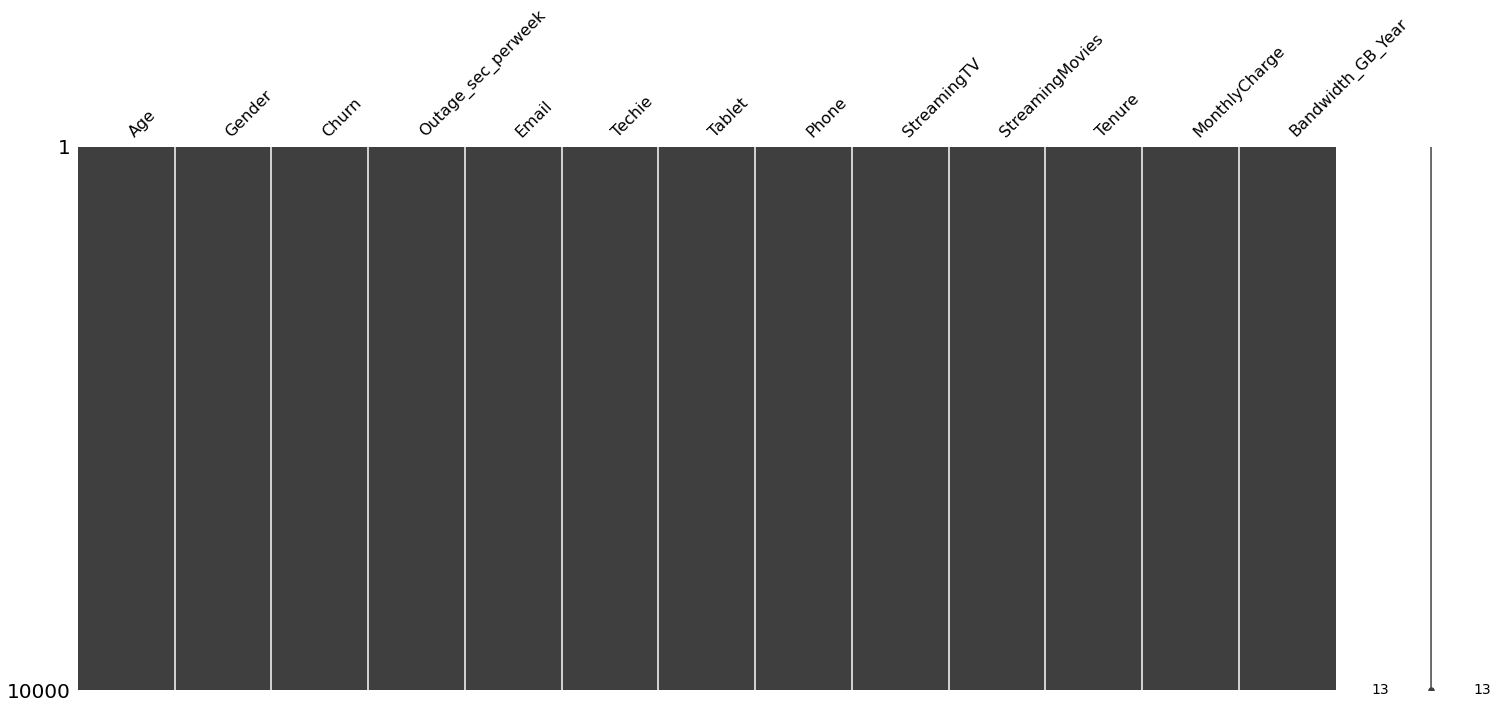

In [26]:
#Visualize the nulls
msno.matrix(df)

In [27]:
#So according to the code we ran, there are no missing values.

In [28]:
#Now we will check for duplicates
df.duplicated().sum()

0

In [29]:
#Looks like there are no duplicates
#Moving on, we will examine the data set's statistics (mean, median, mode, etc)
df.describe()

,Age,Outage_sec_perweek,Email,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.078400,10.001848,12.016000,34.526188,172.624816,3392.341550
std,20.698882,2.976019,3.025898,26.443063,42.943094,2185.294852
min,18.000000,0.099747,1.000000,1.000259,79.978860,155.506715
25%,35.000000,8.018214,10.000000,7.917694,139.979239,1236.470827
50%,53.000000,10.018560,12.000000,35.430507,167.484700,3279.536903
75%,71.000000,11.969485,14.000000,61.479795,200.734725,5586.141370
max,89.000000,21.207230,23.000000,71.999280,290.160419,7158.981530


In [30]:
#Check counts on categorical variables
df['Gender']. value_counts(normalize=True)

Female       0.5025
Male         0.4744
Nonbinary    0.0231
Name: Gender, dtype: float64

In [31]:
df['Churn']. value_counts(normalize=True)

No     0.735
Yes    0.265
Name: Churn, dtype: float64

In [32]:
df['StreamingTV']. value_counts(normalize=True)

No     0.5071
Yes    0.4929
Name: StreamingTV, dtype: float64

In [33]:
df['StreamingMovies']. value_counts(normalize=True)

No     0.511
Yes    0.489
Name: StreamingMovies, dtype: float64

In [34]:
df['Tablet']. value_counts(normalize=True)

No     0.7009
Yes    0.2991
Name: Tablet, dtype: float64

In [35]:
df['Phone']. value_counts(normalize=True)

Yes    0.9067
No     0.0933
Name: Phone, dtype: float64

In [36]:
df.columns

Index(['Age', 'Gender', 'Churn', 'Outage_sec_perweek', 'Email', 'Techie',
       'Tablet', 'Phone', 'StreamingTV', 'StreamingMovies', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

In [37]:
#Now we will turn all the Yes/No values into dummy values
df['DummyMale'] = [1 if v == 'Male' else 0 for v in df['Gender']]
df['DummyFemale'] = [1 if v == 'Female' else 0 for v in df['Gender']]
df['DummyNonbinary'] = [1 if v == 'Nonbinary' else 0 for v in df['Gender']]
df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in df['Churn']]
df['DummyStreamingTV'] = [1 if v == 'Yes' else 0 for v in df['StreamingTV']]
df['DummyStreamingMovies'] = [1 if v == 'Yes' else 0 for v in df['StreamingMovies']]
df['DummyTablet'] = [1 if v == 'Yes' else 0 for v in df['Tablet']]
df['DummyPhone'] = [1 if v == 'Yes' else 0 for v in df['Phone']]

In [38]:
#Next we will drop the categorical variables before we turned them into dummy values
df = df.drop(columns=['Gender', 'Churn', 'StreamingTV', 'StreamingMovies', 'Tablet', 'Phone'])

In [39]:
df.columns
print(df)

      Age  Outage_sec_perweek  Email Techie     Tenure  MonthlyCharge  \
0      68            7.978323     10     No   6.795513     172.455519   
1      27           11.699080     12    Yes   1.156681     242.632554   
2      50           10.752800      9    Yes  15.754144     159.947583   
3      48           14.913540     15    Yes  17.087227     119.956840   
4      83            8.147417     16     No   1.670972     149.948316   
...   ...                 ...    ...    ...        ...            ...   
9995   23            9.415935     12     No  68.197130     159.979400   
9996   48            6.740547     15     No  61.040370     207.481100   
9997   48            6.590911     10     No  47.416890     169.974100   
9998   39           12.071910     14     No  71.095600     252.624000   
9999   28           11.754720     17     No  63.350860     217.484000   

      Bandwidth_GB_Year  DummyMale  DummyFemale  DummyNonbinary  DummyChurn  \
0            904.536110          1          

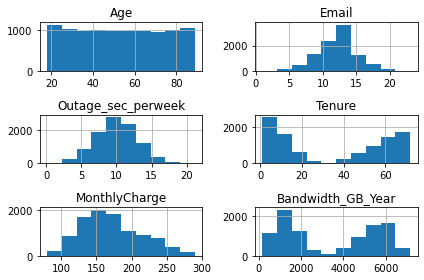

In [40]:
#Histograms to view distributions
df[['Age', 'Email', 'Outage_sec_perweek', 
    'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist()
plt.tight_layout()

/Users/courtneytaylor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

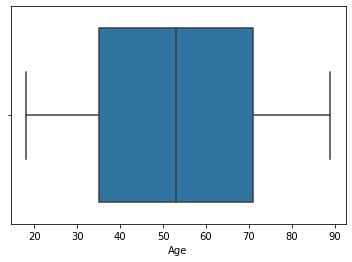

In [41]:
#Boxplots to assess for outliers
sns.boxplot('Age', data = df)

/Users/courtneytaylor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure'>

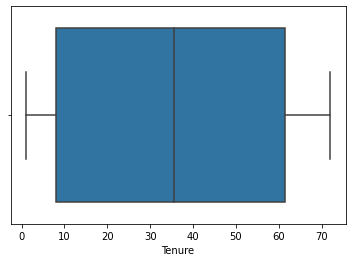

In [42]:
sns.boxplot('Tenure', data = df)

/Users/courtneytaylor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyCharge'>

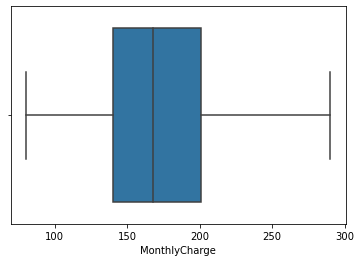

In [43]:
sns.boxplot('MonthlyCharge', data = df)

/Users/courtneytaylor/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Bandwidth_GB_Year'>

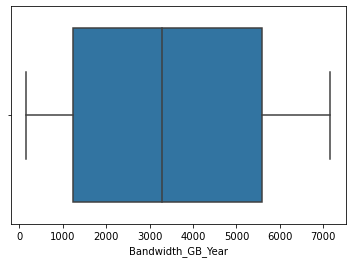

In [44]:
sns.boxplot('Bandwidth_GB_Year', data = df)

<AxesSubplot:xlabel='Age', ylabel='Bandwidth_GB_Year'>

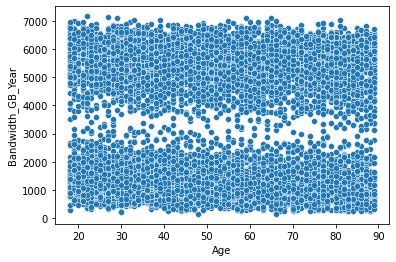

In [45]:
#Now we will do bivariate statistics of the explanatory variables with our target variable
#To do that, we're going to use a scatterplot
sns.scatterplot(x=df['Age'], y=df['Bandwidth_GB_Year'])

<AxesSubplot:xlabel='Email', ylabel='Bandwidth_GB_Year'>

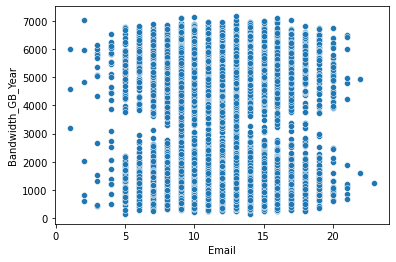

In [46]:
sns.scatterplot(x=df['Email'], y=df['Bandwidth_GB_Year'])

<AxesSubplot:xlabel='MonthlyCharge', ylabel='Bandwidth_GB_Year'>

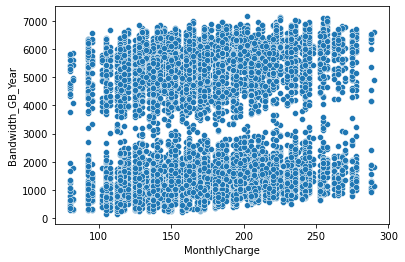

In [47]:
sns.scatterplot(x=df['MonthlyCharge'], y=df['Bandwidth_GB_Year'])

<AxesSubplot:xlabel='Tenure', ylabel='Bandwidth_GB_Year'>

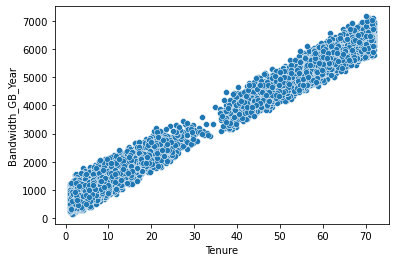

In [48]:
sns.scatterplot(x=df['Tenure'], y=df['Bandwidth_GB_Year'])

In [49]:
#So now that we have prepared our data, we will next extract it
df.to_csv('clean_df.csv')

In [50]:
#Loading the clean data set back in
clean_df = pd.read_csv('clean_df.csv')

In [51]:
#View cleaned columns
clean_df.columns

Index(['Unnamed: 0', 'Age', 'Outage_sec_perweek', 'Email', 'Techie', 'Tenure',
       'MonthlyCharge', 'Bandwidth_GB_Year', 'DummyMale', 'DummyFemale',
       'DummyNonbinary', 'DummyChurn', 'DummyStreamingTV',
       'DummyStreamingMovies', 'DummyTablet', 'DummyPhone'],
      dtype='object')

In [52]:
#Initial Linear Regression Model
clean_df['intercept'] = 1
model = sm.OLS(clean_df['Bandwidth_GB_Year'], clean_df[['Age', 'Outage_sec_perweek', 'Email', 'Tenure', 
                                                        'MonthlyCharge','DummyFemale', 'DummyMale', 'DummyNonbinary', 'DummyChurn', 
                                                        'DummyStreamingTV','DummyStreamingMovies', 
                                                        'DummyTablet', 'DummyPhone', 'intercept']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 8.125e+04
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:40:14   Log-Likelihood:                -68127.
No. Observations:               10000   AIC:                         1.363e+05
Df Residuals:                    9987   BIC:                         1.364e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Age                     -3.4273 

In [53]:
#So we will be dropping any variables with a p-value over 0.05

In [54]:
#Reduced Model
clean_df['intercept'] = 1
reduced_model = sm.OLS(clean_df['Bandwidth_GB_Year'], clean_df[['Age', 'Tenure', 'MonthlyCharge',
                                                           'DummyFemale', 'DummyMale', 'DummyNonbinary', 'DummyChurn', 'DummyStreamingTV',
                                                           'DummyStreamingMovies', 'intercept']]).fit()
print(reduced_model.summary())

                            OLS Regression Results                            
Dep. Variable:      Bandwidth_GB_Year   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 1.219e+05
Date:                Tue, 09 Aug 2022   Prob (F-statistic):               0.00
Time:                        17:40:14   Log-Likelihood:                -68128.
No. Observations:               10000   AIC:                         1.363e+05
Df Residuals:                    9991   BIC:                         1.363e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Age                     -3.4273 

In [55]:
#So, with the reduced model, we can see with the R-Squared that these variables still account for roughly 99% of the variance and are all statistically significant.

<AxesSubplot:xlabel='Age'>

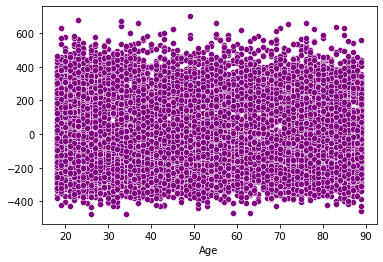

In [56]:
#Now we will do scatterplots of the residuals.
clean_df['intercept'] = 1
residuals = clean_df['Bandwidth_GB_Year'] - reduced_model.predict(clean_df[['Age', 'Tenure', 'MonthlyCharge',
       'DummyMale', 'DummyFemale', 'DummyNonbinary', 'DummyChurn', 'DummyStreamingTV',
       'DummyStreamingMovies', 'intercept']])
sns.scatterplot(x=clean_df['Age'], y=residuals, color='purple')

<AxesSubplot:xlabel='Tenure'>

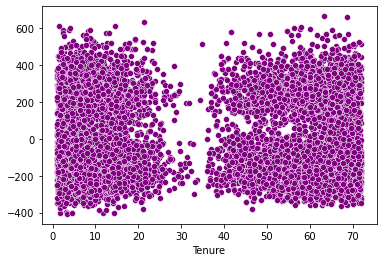

In [57]:
clean_df['intercept'] = 1
residuals = clean_df['Bandwidth_GB_Year'] - reduced_model.predict(clean_df[['Age', 'Tenure', 'MonthlyCharge',
                                                           'DummyFemale', 'DummyMale', 'DummyNonbinary', 'DummyChurn', 'DummyStreamingTV',
                                                           'DummyStreamingMovies', 'intercept']])
sns.scatterplot(x=clean_df['Tenure'], y=residuals, color='purple')

<AxesSubplot:xlabel='MonthlyCharge'>

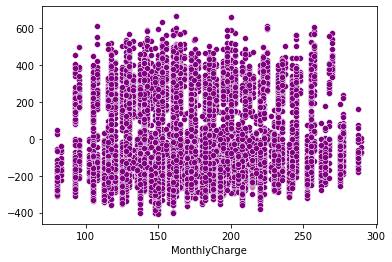

In [58]:
clean_df['intercept'] = 1
residuals = clean_df['Bandwidth_GB_Year'] - reduced_model.predict(clean_df[['Age', 'Tenure', 'MonthlyCharge',
                                                           'DummyFemale', 'DummyMale', 'DummyNonbinary', 'DummyChurn', 'DummyStreamingTV',
                                                           'DummyStreamingMovies', 'intercept']])
sns.scatterplot(x=clean_df['MonthlyCharge'], y=residuals, color='purple')

<AxesSubplot:xlabel='DummyMale'>

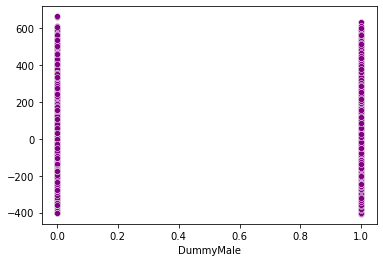

In [59]:
clean_df['intercept'] = 1
residuals = clean_df['Bandwidth_GB_Year'] - reduced_model.predict(clean_df[['Age', 'Tenure', 'MonthlyCharge',
                                                           'DummyFemale', 'DummyMale', 'DummyNonbinary', 'DummyChurn', 'DummyStreamingTV',
                                                           'DummyStreamingMovies', 'intercept']])
sns.scatterplot(x=clean_df['DummyMale'], y=residuals, color='purple')

<AxesSubplot:xlabel='DummyFemale'>

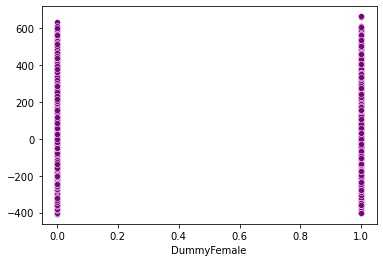

In [60]:
clean_df['intercept'] = 1
residuals = clean_df['Bandwidth_GB_Year'] - reduced_model.predict(clean_df[['Age', 'Tenure', 'MonthlyCharge',
                                                           'DummyFemale', 'DummyMale', 'DummyNonbinary', 'DummyChurn', 'DummyStreamingTV',
                                                           'DummyStreamingMovies', 'intercept']])
sns.scatterplot(x=clean_df['DummyFemale'], y=residuals, color='purple')

<AxesSubplot:xlabel='DummyNonbinary'>

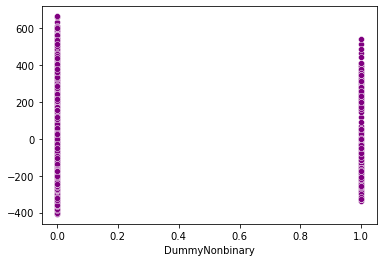

In [61]:
clean_df['intercept'] = 1
residuals = clean_df['Bandwidth_GB_Year'] - reduced_model.predict(clean_df[['Age', 'Tenure', 'MonthlyCharge',
                                                           'DummyFemale', 'DummyMale', 'DummyNonbinary', 'DummyChurn', 'DummyStreamingTV',
                                                           'DummyStreamingMovies', 'intercept']])
sns.scatterplot(x=clean_df['DummyNonbinary'], y=residuals, color='purple')

<AxesSubplot:xlabel='DummyChurn'>

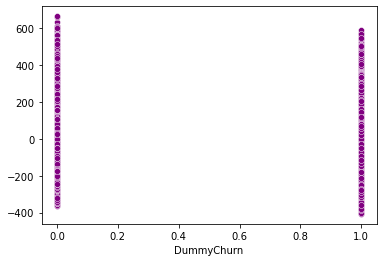

In [62]:
clean_df['intercept'] = 1
residuals = clean_df['Bandwidth_GB_Year'] - reduced_model.predict(clean_df[['Age', 'Tenure', 'MonthlyCharge',
                                                           'DummyFemale', 'DummyMale', 'DummyNonbinary', 'DummyChurn', 'DummyStreamingTV',
                                                           'DummyStreamingMovies', 'intercept']])
sns.scatterplot(x=clean_df['DummyChurn'], y=residuals, color='purple')

<AxesSubplot:xlabel='DummyStreamingTV'>

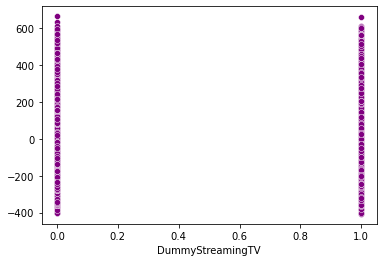

In [63]:
clean_df['intercept'] = 1
residuals = clean_df['Bandwidth_GB_Year'] - reduced_model.predict(clean_df[['Age', 'Tenure', 'MonthlyCharge',
                                                           'DummyFemale', 'DummyMale', 'DummyNonbinary', 'DummyChurn', 'DummyStreamingTV',
                                                           'DummyStreamingMovies', 'intercept']])
sns.scatterplot(x=clean_df['DummyStreamingTV'], y=residuals, color='purple')

<AxesSubplot:xlabel='DummyStreamingMovies'>

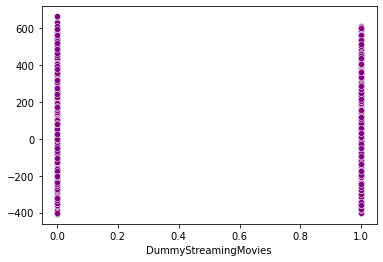

In [64]:
clean_df['intercept'] = 1
residuals = clean_df['Bandwidth_GB_Year'] - reduced_model.predict(clean_df[['Age', 'Tenure', 'MonthlyCharge',
                                                           'DummyFemale', 'DummyMale', 'DummyNonbinary', 'DummyChurn', 'DummyStreamingTV',
                                                           'DummyStreamingMovies', 'intercept']])
sns.scatterplot(x=clean_df['DummyStreamingMovies'], y=residuals, color='purple')